# Úkol č. 1 - část 3 - vizualizace podle osob

  * Tato část obsahuje zbylé vizualizace, týkající se osob oponentů a vedoucích. Je zde v přehledu:
    * Senzam nejpilnějších vedoucích, oponentů a kombinovaných rolí za celou dobu (roky 2007 a 2018).
        * údaje o počtu prací a pořadí
    * Průměrný počet, medián, maximum a rozptylpočtu prací na vedoucího a oponenta a rok.
    * Graf vypovídající o rozložení oponování a vedení prací mezi 200 nejvytíženějších z každé skupiny.
    * Rozložení vedoucích a oponentů podle jejich titulů
    * Údaje o vedení a oponování prací podle typu práce
    


In [2]:
### odtud už je to Vaše
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data file
dt = pd.DataFrame()
dt = pd.read_csv("./CSV/data_names.csv",sep=';')
years = dt['year'].unique()
years.sort(axis=0)
names_oponents = dt['oponent'].unique()
names_supervisors = dt['supervisor'].unique()
names_all = np.array(names_supervisors)
np.append(names_all, names_oponents)
nam = pd.DataFrame(names_all)
#display(nam.head())
names_all = np.array([])
names_all = nam[0].unique()
names_all = names_all[1:]


In [93]:
#dataframe s udaji o oponenture a vedeni jednotlivych osob
names = pd.DataFrame()
names['name'] = names_all
types = ['Bc.', 'Ing.', 'Mgr.']
for i in range(0,len(names_all)):
    name = names_all[i]
    names.at[i, 's_count_all']=len(dt[(dt['supervisor']==name)])
    names.at[i, 's_avg']=len(dt[(dt['supervisor']==name)])/len(years)
    names.at[i, 'o_count_all']=len(dt[(dt['oponent']==name)])
    names.at[i, 'o_avg']=len(dt[(dt['oponent']==name)])/len(years)
    for year in years:
        ind = str('o_'+str(year) )
        names.at[i, ind]=len(dt[(dt['oponent']==name) & (dt['year']==year) ])
        ind = str('s_'+str(year) )
        names.at[i, ind]=len(dt[(dt['supervisor']==name) & (dt['year']==year) ])
    for typ in types:
        names.at[i, 's_'+typ] = len(dt[(dt['supervisor']==name) & (dt['type']==typ)])
        names.at[i, 'o_'+typ] = len(dt[(dt['oponent']==name) & (dt['type']==typ)])
        


In [5]:
def pie_chart(count, typ, title, colors=object):
    sup = names.sort_values(typ+'_count_all', ascending=False)
    c_arr = colors
    best = sup.iloc[:count,:]
    ax = best.plot(kind='pie', figsize=(6, 6), y=str(typ+'_count_all'), legend=True, colors=c_arr,labels=best[typ+'_count_all'])
    ax.legend(labels=best['name'], bbox_to_anchor=(1.6,0.1), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
    ax.set(title=title, xlabel='', ylabel='')
    plt.show()
    
    

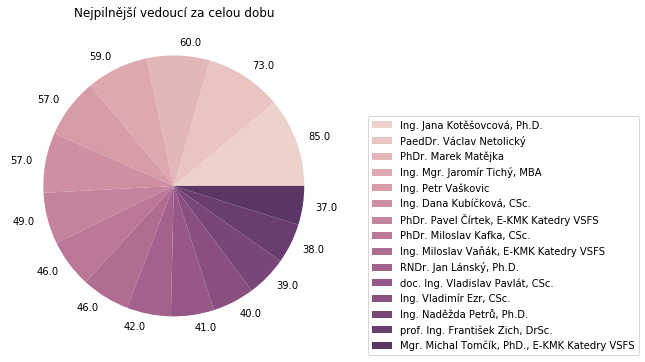

In [6]:
#Nejpilnější vedoucí za celou dobu (2007-2018)
#kolik nejlepsich zobrazime
m = 15

c_arr = np.array(sns.cubehelix_palette(m+3, reverse=False).as_hex())
pie_chart(m, 's', 'Nejpilnější vedoucí za celou dobu', c_arr)


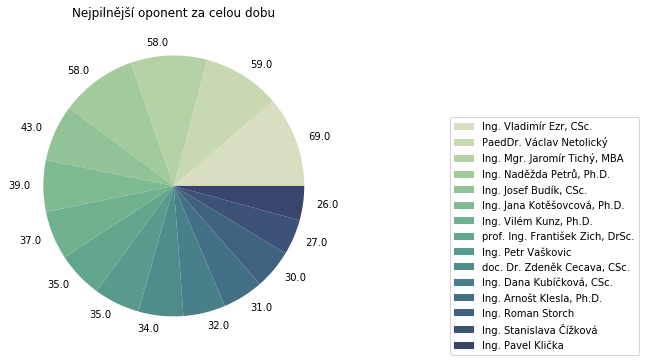

In [7]:
#Nejpilnější oponent
#kolik nejlepsich zobrazime
m = 15

c_arr = np.array(sns.cubehelix_palette(m+3, start=.5, rot=-.75, reverse=False).as_hex())
pie_chart(m, 'o', 'Nejpilnější oponent za celou dobu', c_arr)

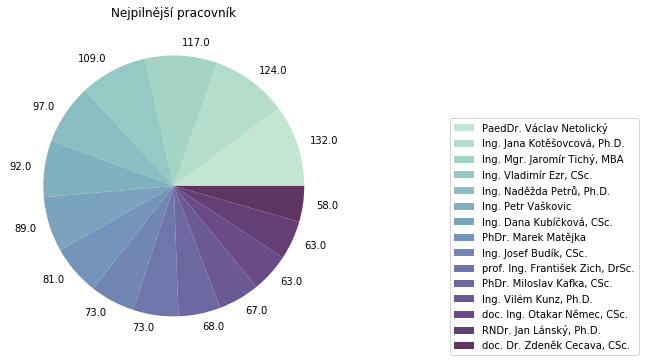

In [8]:
names['count_all'] = names['s_count_all'] + names['o_count_all']
sup = names.sort_values('count_all', ascending=False)
#Nejpilnější pracovnik 
#(pan doktor Netolicky nebyl nejlepsi oponent ani vedouci ale zajistil mezi svymi kolegy celkem nejvice praci)
#kolik nejlepsich pracovniku zobrazime:
m = 15

c_arr = np.array(sns.cubehelix_palette(m+3, start=7, rot=-.75, reverse=False).as_hex())
best = sup.iloc[:m,:]
ax = best.plot(kind='pie', figsize=(6, 6), y=str('count_all'), legend=True, colors=c_arr,labels=best['count_all'])
ax.legend(labels=best['name'], bbox_to_anchor=(1.6,0.1), loc="lower right", 
                      bbox_transform=plt.gcf().transFigure)
ax.set(title="Nejpilnější pracovník", xlabel='', ylabel='')
plt.show()

In [87]:
#Graf zobrazujici ruzna data (prumerny pocet, median, maximum, rozptyl praci) na cloveka a rok (oponenti i vedouci. viz dole zelene a ruzove grafy)
def people_years_chart(typ, title, c_arr):
    data = pd.DataFrame()
    dat = names.loc[names[str(typ)+'_count_all'] > 0]
    #display(dat.head(10))
    data['year'] = years[1:]
    data['avg'] = 0.0
    data['median'] = 0.0
    data['var'] = 0.0
    data['max'] = 0.0
    index = 0
    
    
    for year in years[1:]:
        year_str = str(typ)+'_'+str(year)
        dataX = dat.loc[dat[year_str] > 0.0]
        data.at[index , 'avg'] = float(dataX[year_str].mean())
        data.at[index , 'max'] = int(dataX[year_str].max())
        data.at[index , 'median'] = int(dataX[year_str].median(axis=0))
        data.at[index , 'var'] = float(dataX[year_str].var())
        index += 1
        
    display(data)
    a_data = pd.DataFrame()
    a_data['year'] = years[1:]
    a_data['avg'] = data['avg']
    
    a_data['avg + var'] = data['avg']+data['var']
    a_data['avg - var'] = data['avg']-data['var']
    #print(dat['s_2010'].median())
    ax = data.plot(figsize=(10, 5),legend=True, kind='area', x='year', color = c_arr, xticks=years[1:])
    ax.legend(labels=['avg','median', 'var','max'], loc="upper right")
    ax.set(title=title, xlabel='years', ylabel='thesis count')
    
    ax2 = a_data.plot(figsize=(10, 3),legend=True, kind='line', x='year', color = c_arr, xticks=years[1:])
    ax2.legend(labels=['avg','avg + var', 'avg - var'], loc="upper right")
    ax2.set(title='Průměr a rozptyl', xlabel='years', ylabel='thesis count')



,year,avg,median,var,max
0,2007,2.285714,2.0,4.098701,9.0
1,2008,2.686275,2.0,5.167929,11.0
2,2009,2.601626,2.0,5.339997,14.0
3,2010,2.392308,2.0,3.635599,9.0
4,2011,2.383562,2.0,3.189797,10.0
5,2012,2.413223,2.0,4.127824,10.0
6,2013,2.303704,2.0,3.407076,12.0
7,2014,2.666667,2.0,4.224189,9.0
8,2015,2.483051,2.0,2.850138,9.0
9,2016,2.440000,2.0,2.774141,9.0


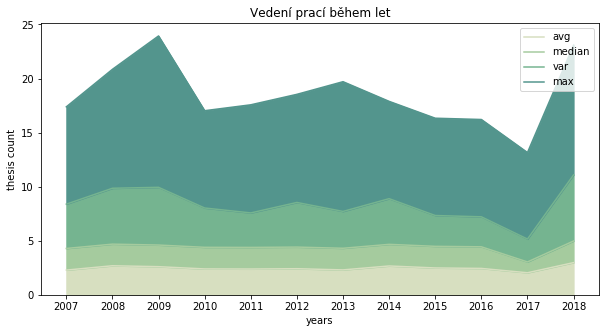

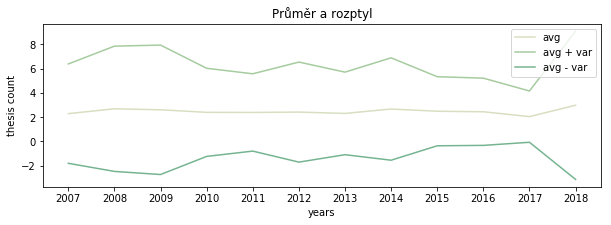

In [88]:
#tabulka vedouci za celou dobu
c_arr = np.array(sns.cubehelix_palette(7, start=.5, rot=-.75, reverse=False).as_hex())
people_years_chart('s', 'Vedení prací během let', c_arr)

,year,avg,median,var,max
0,2007,2.142857,1.0,5.361345,12.0
1,2008,3.421053,2.0,13.223329,17.0
2,2009,2.382979,2.0,4.284921,10.0
3,2010,2.575000,2.0,7.019872,14.0
4,2011,2.822222,2.0,6.422222,10.0
5,2012,2.522727,1.0,6.115751,12.0
6,2013,2.680000,2.0,3.854694,10.0
7,2014,2.804348,2.0,5.627536,15.0
8,2015,2.444444,2.0,2.252525,7.0
9,2016,2.226415,2.0,2.370827,9.0


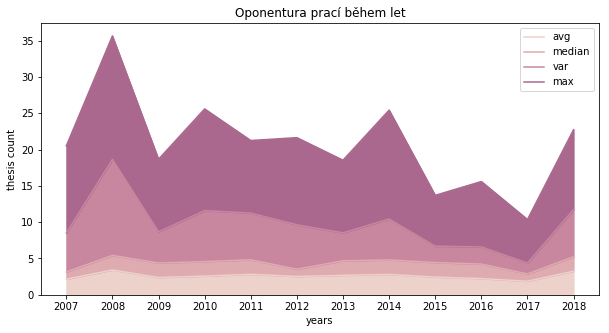

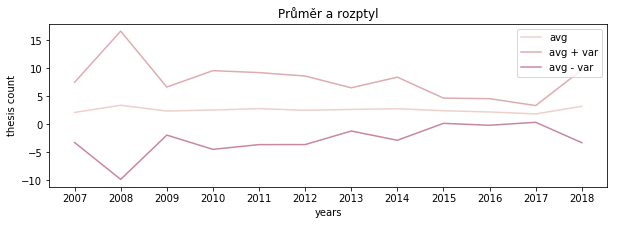

In [89]:
#tabulka oponenti za celou dobu
c_arr = np.array(sns.cubehelix_palette(7, start=0, reverse=False).as_hex())
people_years_chart('o', 'Oponentura prací během let', c_arr)

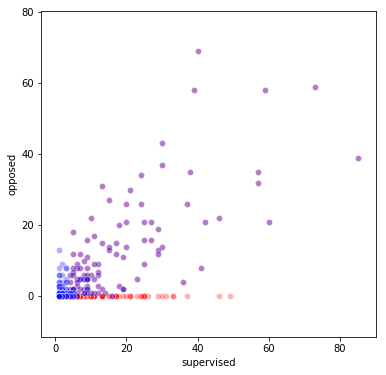

In [16]:
#Korelace mezi mnozstvim vedenych praci a oponentur, vzdy 200 nevytizenejsich oponentu a vedoucich (fialova tvori prekryv)
sup = names.sort_values('s_count_all', ascending=False)
sup = sup.iloc[:200,:]
op = names.sort_values('o_count_all', ascending=False)
op = op.iloc[:200,:]

plt.figure(figsize=(6, 6))
sns.scatterplot(data=sup, x='s_count_all', y='o_count_all', color='red', alpha=0.3)
ax = sns.scatterplot(data=op, x='s_count_all', y='o_count_all', color='blue', alpha=0.3)
ax.set(xlabel='supervised', ylabel='opposed')
plt.axis('equal')
plt.show()

#velke mnozstvi lidi vede i oponuje male mnozstvi praci
#velmi malo oponentu nevedlo zadnou praci
#naopak spousta vedoucich nikdy neoponovalo (vyrazna cervena cara dole)

#nejvetsi drici udrzuji balanc mezi vedenim a oponovanim praci - fialova na diagonale

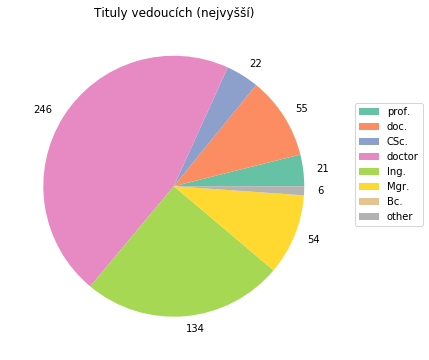

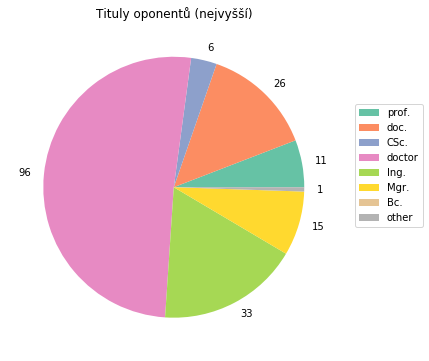

In [67]:
#rozdeleni podle titulu *tato statistika je negativne "podhodnocena" cistenim duplicit jmen ve 2. casti ukolu 
#(nektere nove tituly byly uzmuty)

# hiearchie titulu je zde brana podle teto stupnice:
#prof.>doc.>CSc.>doktor>Ing.=Mgr.>Bc.>other
c_arr = np.array(sns.color_palette("Set2", 10).as_hex())
def people_degree_chart(typ, title):
    titles=['Ing.', 'Mgr.', 'Bc.', 'doc.', 'prof']
    doktor = ['PhDr.', 'PaeDr.', 'CSc.', 'RNDr.', 'Dr.', 'PHDr.', 'JUDr.', 'Ph.D.']
    data = pd.DataFrame()
    dat = names.loc[names[str(typ)+'_count_all'] > 0]
    dat = dat.loc[:,:]
    indexes = ['prof.', 'doc.',  'CSc.','doctor','Ing.', 'Mgr.', 'Bc.', 'other']
    data['title'] = indexes
    data['sum'] = 0
    data.set_index('title', inplace=True)
    for index2, row in dat.iterrows():
        name = str(row[0])
        if('prof.' in name):
            data.loc['prof.']['sum'] = int(data.loc['prof.']['sum']) + 1
        elif('doc.' in name):
            data.loc['doc.']['sum'] = int(data.loc['doc.']['sum']) + 1
        elif('CSc.' in name):
            data.loc['CSc.']['sum'] = int(data.loc['CSc.']['sum']) + 1
        else:
            k=1
            for d in doktor:
                if(d in name):
                    data.loc['doctor']['sum'] = int(data.loc['doctor']['sum']) + 1
                    k=0
            if(('Ing.' in name or 'ing.' in name) and k):
                data.loc['Ing.']['sum'] = int(data.loc['Ing.']['sum']) + 1
            elif('Mgr.' in name and k):
                data.loc['Mgr.']['sum'] = int(data.loc['Mgr.']['sum']) + 1
            elif('Bc.' in name and k):
                data.loc['Bc.']['sum'] = int(data.loc['Bc.']['sum']) + 1
            else:
                if(k==0):continue
                data.loc['other']['sum'] = int(data.loc['other']['sum']) + 1
                #print(name)
        
    #display(data)
    ax = data.plot(kind='pie', figsize=(6, 6), y='sum', legend=True, colors=c_arr,labels=data['sum'])
    ax.legend(labels=indexes, bbox_to_anchor=(1.1,0.4), loc="lower right", 
                      bbox_transform=plt.gcf().transFigure)
    ax.set(title=title, xlabel='', ylabel='')
    plt.show()
        
            

people_degree_chart('s', 'Tituly vedoucích (nejvyšší)')

people_degree_chart('o', 'Tituly oponentů (nejvyšší)')

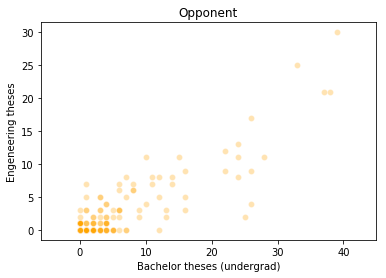

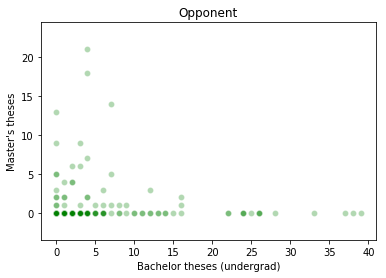

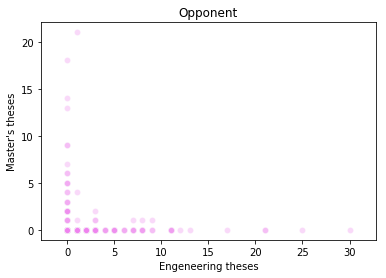

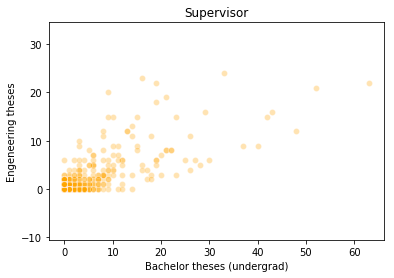

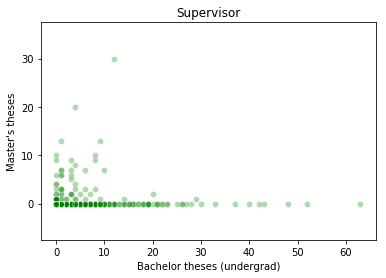

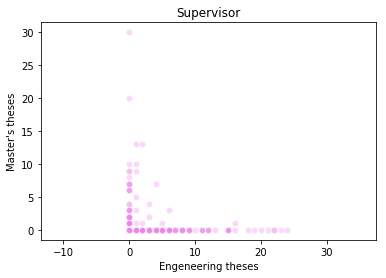

In [107]:
#Vedeni praci podle typu prace
def person_by_work_type(typ, title):
    data = pd.DataFrame()
    dat = names.loc[names[str(typ)+'_count_all'] > 0]
    
    plt.figure()
    ax = sns.scatterplot(data=dat, x=typ+'_Bc.', y=typ+'_Ing.', color='orange', alpha=0.3)
    ax.set(title=title, xlabel='Bachelor theses (undergrad)', ylabel='Engeneering theses')
    plt.axis('equal')
    plt.show()
    
    plt.figure()
    ax = sns.scatterplot(data=dat, x=typ+'_Bc.', y=typ+'_Mgr.', color='green', alpha=0.3)
    ax.set(title=title, xlabel='Bachelor theses (undergrad)', ylabel='Master\'s theses')
    plt.axis('equal')
    plt.show()
    
    plt.figure()
    ax = sns.scatterplot(data=dat, x=typ+'_Ing.', y=typ+'_Mgr.', color='violet', alpha=0.3)
    ax.set(title=title, xlabel='Engeneering theses', ylabel='Master\'s theses')
    plt.axis('equal')
    plt.show()
    
    
    
#display(names.head()) 
person_by_work_type('o', 'Opponent')
person_by_work_type('s', 'Supervisor')


#Zajimave je ze oponenti i vedoouci casto zaopatruji jak bakalarske prace, tak inzenyrske, 
#nicmene v pripade magisterskych praci je tento vztah spise vylucny, coz ale muze byt hlavne malym poctem Mgr. praci v databazi.